In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df1 = df.copy()

In [6]:
df1 = df1.drop(columns=['Customer','State','Effective To Date','Location Code','Marital Status','Sales Channel','Number of Open Complaints'],axis=1)
df1.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,69,32,5,1,Corporate Auto,Corporate L3,Offer1,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,94,13,42,8,Personal Auto,Personal L3,Offer3,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,108,18,38,2,Personal Auto,Personal L3,Offer1,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,106,18,65,7,Corporate Auto,Corporate L2,Offer1,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,73,12,44,1,Personal Auto,Personal L1,Offer1,138.130879,Four-Door Car,Medsize


In [7]:
category_col = df1.select_dtypes(include = 'object').columns
category_col

Index(['Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')

In [8]:
numerical_col = df1.select_dtypes(exclude = 'object').columns
numerical_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

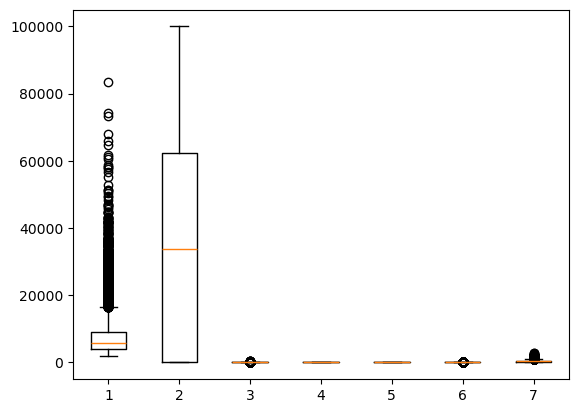

In [9]:
plt.boxplot(df1[numerical_col])
plt.show()

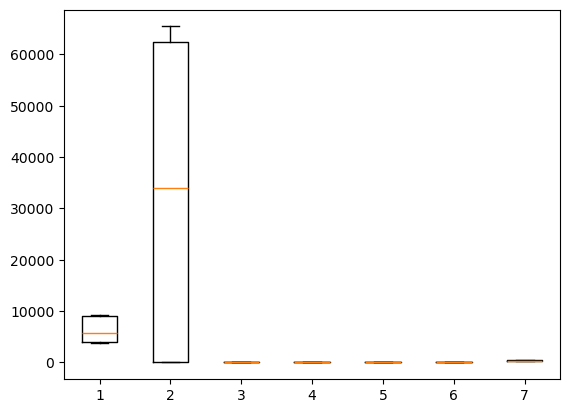

In [10]:
from feature_engine.outliers import Winsorizer
a = Winsorizer(capping_method = 'iqr',tail='both',fold = 0.05,variables=list(numerical_col))
df2 = a.fit_transform(df1)
plt.boxplot(df2[numerical_col])
plt.show()

In [11]:
df2.head()

,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Total Claim Amount,Vehicle Class,Vehicle Size
0,3745.856032,No,Basic,Bachelor,Employed,F,56274,69.0,23.85,21.65,1.00,Corporate Auto,Corporate L3,Offer1,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,94.0,13.00,42.00,4.15,Personal Auto,Personal L3,Offer3,561.277668,Four-Door Car,Medsize
2,9210.562804,No,Premium,Bachelor,Employed,F,48767,108.0,18.00,38.00,2.00,Personal Auto,Personal L3,Offer1,561.277668,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,106.0,18.00,65.00,4.15,Corporate Auto,Corporate L2,Offer1,529.881344,SUV,Medsize
4,3745.856032,No,Basic,Bachelor,Employed,M,43836,73.0,12.00,44.00,1.00,Personal Auto,Personal L1,Offer1,258.495415,Four-Door Car,Medsize


In [12]:
from sklearn.preprocessing import OneHotEncoder
b = OneHotEncoder(sparse_output=False)
enc_df  = b.fit_transform(df2[list(category_col)])
encoded = pd.DataFrame(enc_df,columns=b.get_feature_names_out())
df3 = pd.concat([df2.drop(columns=list(category_col)),encoded],axis=1)
df3.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,Response_No,Response_Yes,Coverage_Basic,...,Renew Offer Type_Offer4,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,3745.856032,56274,69.0,23.85,21.65,1.00,384.811147,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,6979.535903,0,94.0,13.00,42.00,4.15,561.277668,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9210.562804,48767,108.0,18.00,38.00,2.00,561.277668,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106.0,18.00,65.00,4.15,529.881344,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,3745.856032,43836,73.0,12.00,44.00,1.00,258.495415,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
df3_scaled = c.fit_transform(df3)
df3 = pd.DataFrame(df3_scaled, columns=df3.columns, index=df3.index)

df3.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,Response_No,Response_Yes,Coverage_Basic,...,Renew Offer Type_Offer4,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-1.187225,0.876520,-0.969678,1.272727,-1.265831,-1.065919,-0.154984,0.408822,-0.408822,0.800278,...,-0.355336,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.339904,0.649504,-0.489233
1,0.294422,-1.351899,0.391707,-0.188428,-0.275540,1.448983,1.302614,0.408822,-0.408822,-1.249565,...,-0.355336,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
2,1.316661,0.579247,1.154082,0.484916,-0.470192,-0.267537,1.302614,0.408822,-0.408822,-1.249565,...,-0.355336,-1.011895,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,-0.339904,0.649504,-0.489233
3,0.599727,-1.351899,1.045172,0.484916,0.843709,1.448983,1.043283,0.408822,-0.408822,0.800278,...,-0.355336,-1.011895,-0.134795,-0.143383,2.021323,-0.236545,-0.510108,-0.339904,0.649504,-0.489233
4,-1.187225,0.383982,-0.751856,-0.323096,-0.178214,-1.065919,-1.198341,0.408822,-0.408822,0.800278,...,-0.355336,0.988245,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,-0.339904,0.649504,-0.489233


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
df4 = pca.fit_transform(df3)
pca.explained_variance_ratio_

array([0.06815919, 0.06342148, 0.05498316, 0.04775716, 0.0429706 ,
       0.04155   ])

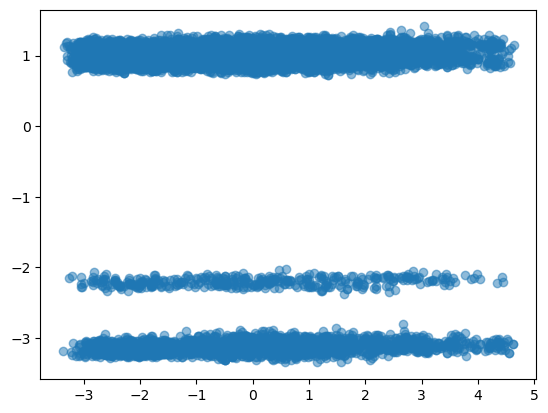

In [15]:
plt.scatter(df4[:, 0], df4[:, 1], alpha=0.5)
plt.show()

In [16]:
df5 = pd.DataFrame(df4,columns=['pc0','pc1','pc2','pc3','pc4','pc5'])
df5.head()

,pc0,pc1,pc2,pc3,pc4,pc5
0,-1.708116,-3.246894,-0.421676,0.349832,-1.012279,1.359410
1,2.061804,1.161743,-1.232466,1.298402,0.365367,1.338181
2,1.385857,1.048580,2.153015,0.837672,-0.119306,1.382756
3,3.153171,-3.084945,-1.232438,0.542058,-1.504840,-1.213827
4,-2.017879,0.837923,-0.846621,0.200271,-0.438429,-1.124999


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|████████████████████████| 23/23 [00:14<00:00,  1.62it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [20].
[clusteval] >INFO> Fin.


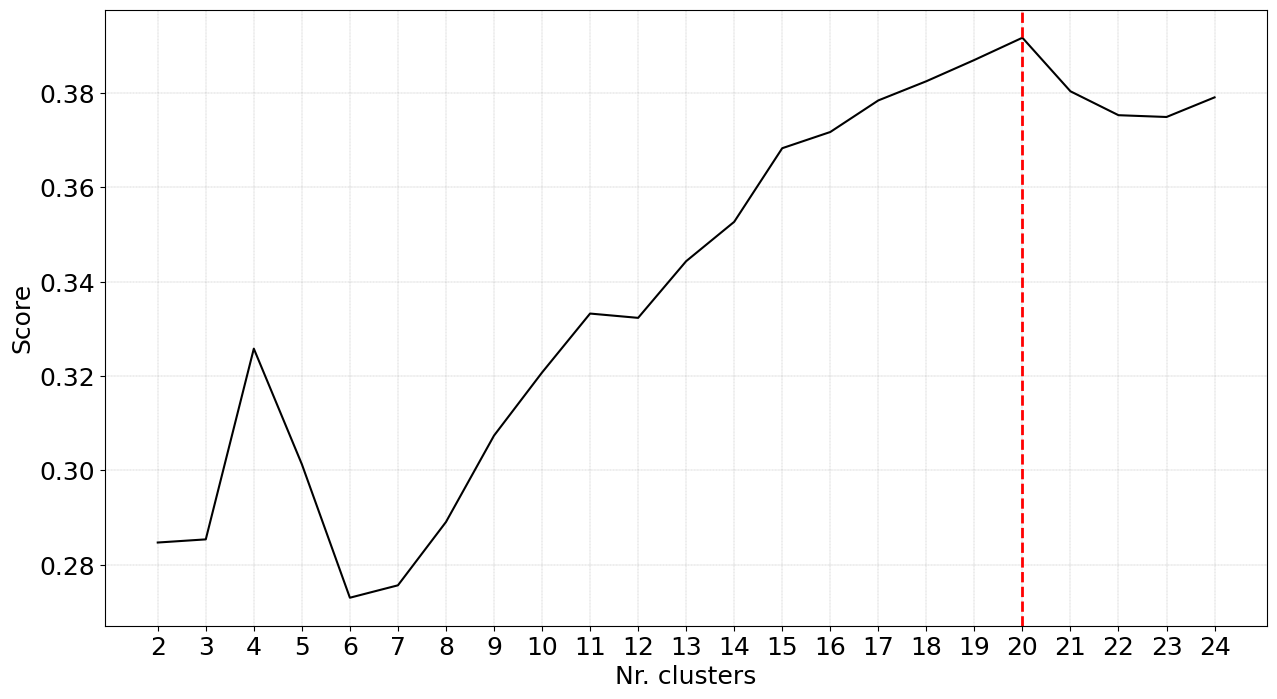

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [21]:
from sklearn.cluster import AgglomerativeClustering
from clusteval import clusteval
ce = clusteval(cluster='agglomerative', evaluate='silhouette')
ce.fit(df5)
ce.plot()
